In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_excel('ex1.xlsx')
data.isnull().sum()
data.fillna(data.mean())
data.drop_duplicates()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [4]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


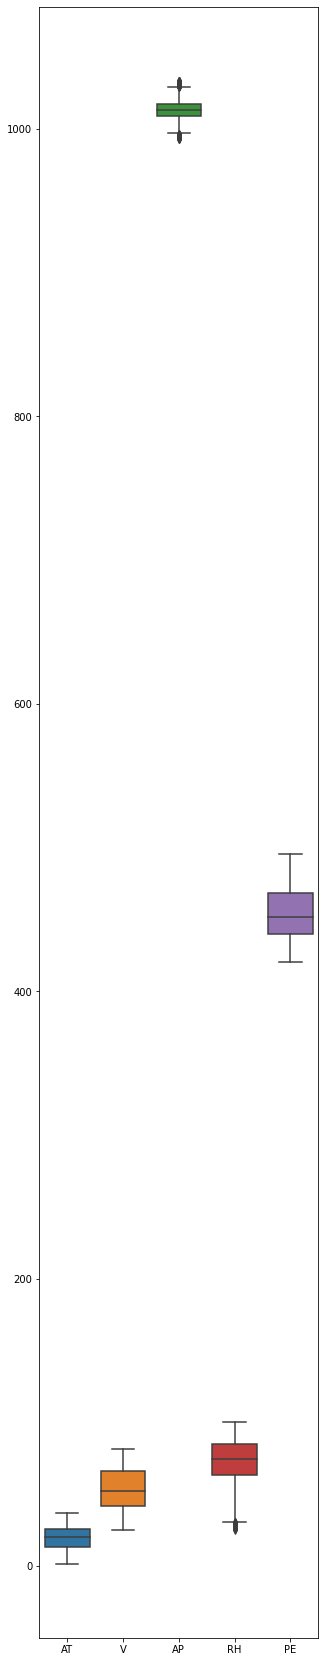

In [5]:
#使用plt绘制箱型图，查看数据分布情况，将其调整到合适的范围
plt.figure(figsize=(5,30))
sns.boxplot(data=data)
plt.show()


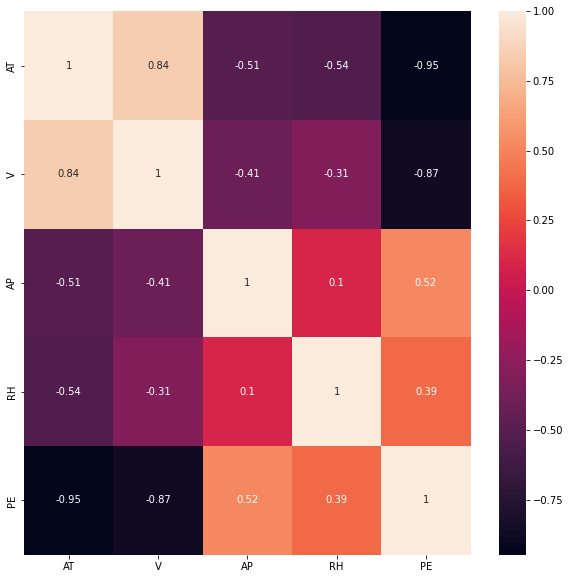

In [6]:
#使用plt和sns绘制热力图
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [7]:
X = data[['AT','V','AP','RH']]
y = data['PE']
print(X.shape)
print(y.shape)

(9568, 4)
(9568,)


In [8]:
model = LinearRegression()
model.fit(X,y)
print(model.coef_)
model.score(X,y)

[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]


0.9286960898122536

In [9]:
#导入训练集和测试集数据的划分（训练集80%，测试集20%）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#打印精确性结果
print(model.score(X_train, y_train))

0.9277240024503881


In [10]:
#利用线性回归模型和训练数据进行拟合
model.fit(X_train, y_train)
#打印拟合后的结果
print(model.score(X_train, y_train))

0.9277253998587902


In [11]:
 #利用测试集得到线性回归模型的精确性
y_pred = model.predict(X_test)
print(y_pred)

[431.42761597 458.56124622 462.75264705 ... 469.51835895 442.41759454
 461.88279939]


In [12]:
#线性回归模型的回归系数、截距
print(model.coef_)
print(model.intercept_)

[-1.97313099 -0.23649993  0.06387891 -0.15807019]
452.8410371616381
